In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


Data Formatting for Convolutional Neural Network


In [ ]:
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.mnist.load_data()
# reserving some data for validation
x_val2 = x_train2[-5000:]
y_val2 = tf.keras.utils.to_categorical(y_train2[-5000:])
# training data
x_train2 = x_train2[:-5000]
x_train2 = x_train2.reshape((x_train2.shape[0], 28, 28, 1))
x_val2 = x_val2.reshape((x_val2.shape[0], 28, 28, 1))
y_train2 = tf.keras.utils.to_categorical(y_train2[:-5000])
print(x_train2.shape)
print(y_train2.shape)

(55000, 28, 28, 1)
(55000, 10)


In [ ]:
(x_train1, y_train1), (x_test1, y_test1) = tf.keras.datasets.mnist.load_data()
# reserving some data for validation
x_val1 = x_train1[-5000:]
y_val1 = y_train1[-5000:]
x_train1 = x_train1[:-5000]
y_train1 = y_train1[:-5000]
# training data
print(x_train1.shape)
print(y_train1.shape)

(55000, 28, 28)
(55000,)


Building the model for image processing. We have 50000, 32 by 32 color images that need to be provided to the input. The model will use backtracking and stochastic gradient descent to optimize the weights.

In [ ]:
# making a sequential model for processing the matrix
tf.keras.Input(
    shape = (28, 28)
)
model1 = keras.Sequential(
    [      
     layers.Flatten(input_shape = (28, 28, 1)),        
     layers.Dense(380, activation = 'relu'),
     layers.Dense(180, activation = 'relu'),
     layers.Dense(10, activation='softmax')
    ]
)
model2 = keras.Sequential(
    [
        layers.Conv2D(32, 3, input_shape = (28, 28, 1), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model1.summary()
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 380)               298300    
                                                                 
 dense_28 (Dense)            (None, 180)               68580     
                                                                 
 dense_29 (Dense)            (None, 10)                1810      
                                                                 
Total params: 368,690
Trainable params: 368,690
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)     

Training the model. Once again we will us SGD to optimize the weights of the MLP.

In [ ]:
model1.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


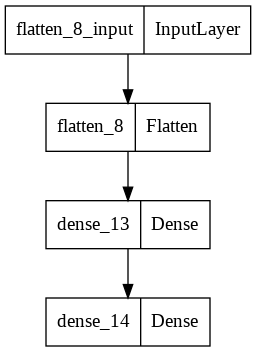

In [ ]:
tf.keras.utils.plot_model(
    model1,
    to_file='model1.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)


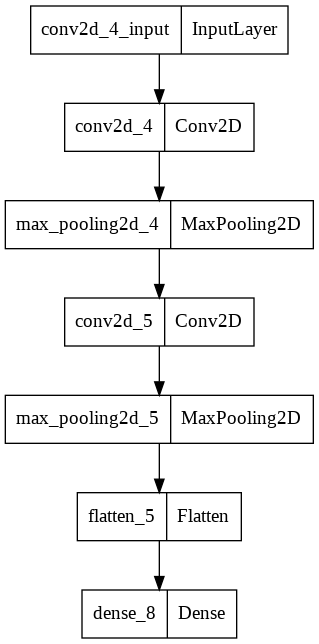

In [ ]:
tf.keras.utils.plot_model(
    model2,
    to_file='model2.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [ ]:
print("Fit model on training data")
print(x_val.shape)
print(y_val.shape)

history = model1.fit(
    x_train1,
    y_train1,
    batch_size = 64,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data = (x_val1, y_val1)
)

Fit model on training data
(5000, 28, 28, 1)
(5000, 10)
Epoch 1/50
849/860 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0991

In [ ]:
print("Fit model on training data")
print(x_val.shape)
print(y_val.shape)

history = model2.fit(
    x_train2,
    y_train2,
    batch_size = 64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data = (x_val2, y_val2)
)

Fit model on training data
(5000, 28, 28, 1)
(5000, 10)
Epoch 1/10
860/860 [==============================] - 6s 6ms/step - loss: 3.0520 - accuracy: 0.1159 - val_loss: 2.3016 - val_accuracy: 0.1060
Epoch 2/10
860/860 [==============================] - 5s 6ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 3/10
860/860 [==============================] - 5s 6ms/step - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 4/10
860/860 [==============================] - 6s 7ms/step - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 6/10
860/860 [==============================] - 5s 6ms/step - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.3018 - val_accuracy: 0.1060
Epoch 7/10
860/860 [==============================] - 5s 6ms/step - loss: 2.3012 - accuracy:

# New Section